# Neural Networks

## Data set for digit recognition, 8x8 image size

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [27]:
from sklearn import datasets, metrics
from sklearn.neural_network import MLPClassifier
from sklearn import tree

# the digits dataset
digits= datasets.load_digits()


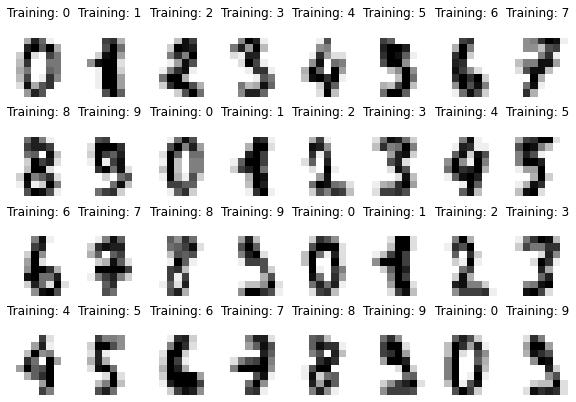

In [28]:
images_and_labels = list(zip(digits.images, digits.target))
plt.figure(figsize= (10,7))
for index, (image, label) in enumerate(images_and_labels[:32]):
    plt.subplot(4, 8, index+1)
    plt.axis ('off')
    plt.imshow(image, cmap= plt.cm.gray_r)
    plt.title('Training: %i\n' % label)    
plt.show()

In [29]:
len(images_and_labels)

1797

## Preprocessing

In [30]:
# to apply classification on this data, we need to flatten the image, to 
# turn the data in a (sample, features) matrix:
n_samples = len(digits.images)
data = digits.images.reshape(n_samples, -1)
data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [31]:
# Creating a classifier

classifier = MLPClassifier(hidden_layer_sizes= (100,))

# We learn the digits on the first half of the digits
classifier.fit(data, digits.target)

# Now predict the values of the digit on the second half
expected = digits.target
predicted = classifier.predict(data)
predicted

array([0, 1, 2, ..., 8, 9, 8])

## Not currently classified pictures

In [35]:
import numpy as np
import matplotlib.pyplot as plt
index =0
misclassified = []
for label, predict in zip(expected, predicted):
    if label != predict:
        misclassified.append(index)
        index +=1
number_of_misclassified_data = len(misclassified)
print('indices of missclassified data', misclassified)
print('number of misscalssified pictures', number_of_misclassified_data)

indices of missclassified data []
number of misscalssified pictures 0


## Accuracy of the model

In [36]:
score= classifier.score(data, expected)
print('Accuracy of model is:', score)

Accuracy of model is: 1.0


In [37]:
# Evaluation using Confusion matrix
print('classification report of the classifier %s: \n %s \n' 
% (classifier, metrics.classification_report(expected, predicted)))
print('Confusion Matrix: \n %s' % metrics.confusion_matrix(expected, predicted))

classification report of the classifier MLPClassifier(): 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       178
           1       1.00      1.00      1.00       182
           2       1.00      1.00      1.00       177
           3       1.00      1.00      1.00       183
           4       1.00      1.00      1.00       181
           5       1.00      1.00      1.00       182
           6       1.00      1.00      1.00       181
           7       1.00      1.00      1.00       179
           8       1.00      1.00      1.00       174
           9       1.00      1.00      1.00       180

    accuracy                           1.00      1797
   macro avg       1.00      1.00      1.00      1797
weighted avg       1.00      1.00      1.00      1797
 

Confusion Matrix: 
 [[178   0   0   0   0   0   0   0   0   0]
 [  0 182   0   0   0   0   0   0   0   0]
 [  0   0 177   0   0   0   0   0   0   0]
 [  0   0   0 183   0   0   0  

## Splitting data into training and testing datasets


## lmporting digits dataset from sklearn

In [38]:
from sklearn.datasets import load_digits
new_digit = load_digits()
type(new_digit)

sklearn.utils.Bunch

In [39]:
# view digits data
new_digit.data.shape

(1797, 64)

In [40]:
# Setting descriptive and target features (data= descriptive, target= target in the set)

decriptive_features= new_digit.data
target_feature= new_digit.target

decriptive_features.shape, target_feature.shape

((1797, 64), (1797,))

## Splitting data

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(decriptive_features, target_feature, test_size=0.2, random_state= 0) 

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((1437, 64), (360, 64), (1437,), (360,))

## Training Model - Neural Network

## 10 Hidden Layers

In [43]:
# create a classifier:

classifier_10 = MLPClassifier(hidden_layer_sizes= (10,))

# # learing digits on the first half of the digits

classifier_10.fit(X_train, y_train)



D:\anaconda1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(10,))

# Prediction



In [44]:
y_pred = classifier_10.predict(X_test)

# Accuracy

In [45]:
score_10 = classifier_10.score(X_test, y_test)
print('Accuracy = ', score_10)

Accuracy =  0.9222222222222223


## 100 Hidden Layers

In [52]:
classifier_100 = MLPClassifier(hidden_layer_sizes= (100,))

# # learing digits on the first half of the digits

classifier_100.fit(X_train, y_train)

y_pred = classifier_100.predict(X_test)

score_100 = classifier_100.score(X_test, y_test)
print('Accuracy = ', score_100)

Accuracy =  0.9694444444444444


## 1000 Hidden Layers

In [51]:
classifier_1000 = MLPClassifier(hidden_layer_sizes= (1000,))

# # learing digits on the first half of the digits

classifier_1000.fit(X_train, y_train)

y_pred = classifier_1000.predict(X_test)

score_1000 = classifier_1000.score(X_test, y_test)
print('Accuracy = ', score_1000)

Accuracy =  0.9777777777777777


## 10000 Hidden Layers

In [53]:
classifier_10000 = MLPClassifier(hidden_layer_sizes= (10000,))

# # learing digits on the first half of the digits

classifier_10000.fit(X_train, y_train)

y_pred = classifier_10000.predict(X_test)

score_10000 = classifier_10000.score(X_test, y_test)
print('Accuracy = ', score_10000)

Accuracy =  0.9833333333333333


## 100000 Hidden Layers

In [54]:
classifier_100000 = MLPClassifier(hidden_layer_sizes= (100000,))

# # learing digits on the first half of the digits

classifier_100000.fit(X_train, y_train)

y_pred = classifier_100000.predict(X_test)

score_100000 = classifier_100000.score(X_test, y_test)
print('Accuracy = ', score_100000)

Accuracy =  0.9805555555555555


## Relationship between Number of hidder layers and accuracy

In [55]:
X= [10,100,1000,10000, 100000]
y = [score_10, score_100, score_1000, score_10000, score_100000]

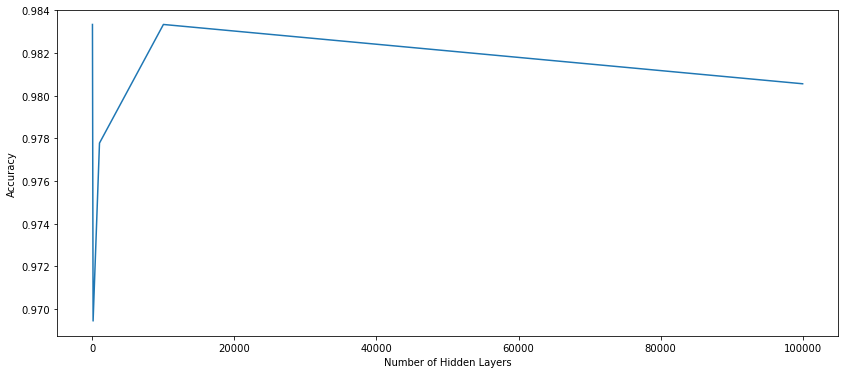

In [56]:
# Plotting the graph
import seaborn as sns
plt.figure(figsize=(14,6))
a= sns.lineplot(x=X, y=y, ci= None)
a.set(xlabel = 'Number of Hidden Layers', ylabel = 'Accuracy')
plt.show()

## Confusion Matrix

In [58]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred) 
cm

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 34,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 36,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 29,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 29,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 39,  0,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 39,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 38,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  1,  0, 39]], dtype=int64)

## Creating HEATMAP for confusion matrix

Text(0.5, 1.0, 'Accuracy Score : 0.9833333333333333')

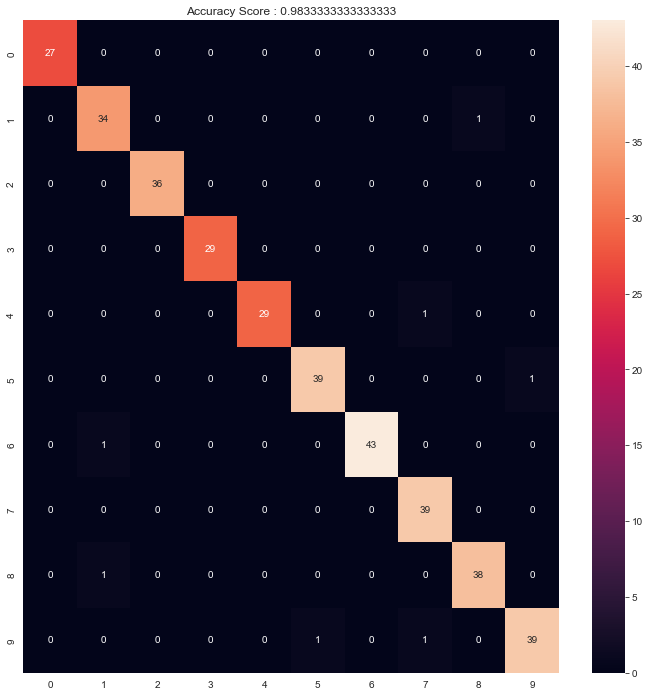

In [61]:
sns.set_style(style = 'whitegrid')
plt.figure(figsize = (12,12))
sns.heatmap(cm, annot = True)
plt.ylabel = 'Actual Output'
plt.xlabel = 'Predicted Output'
cm_title = "Accuracy Score : {0}".format(score_10000)
plt.title(cm_title)
